<a href="https://colab.research.google.com/github/stroboskop/data-sience-bootcamp/blob/main/02_analiza_danych/dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# dane gieldowe

In [ ]:
import numpy as np
import pandas as pd

#załadowanie danych

def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

# df = fetch_financial_data()
# df.info()

# Eksploracja danych


In [ ]:
#wyświetli pierwsze 5
df.head()

#wyświetli ostatnie 5
df.tail()

df.columns = [col.lower() for col in df.columns]
df.head()


,open,high,low,close,volume
Date,,,,,
2021-12-06,3393.0,3473.910,3338.69,3427.37,3443000
2021-12-03,3455.0,3469.865,3338.60,3389.79,4035550
2021-12-02,3460.0,3492.700,3423.75,3437.36,3236288
2021-12-01,3545.0,3559.880,3441.60,3443.72,3756995
2021-11-30,3563.5,3585.770,3492.01,3507.07,4001107


# Selekcja kolumn

In [ ]:
df = df.head(10)

df

df.loc['2021-12-06', 'close']

Date
2021-12-06    3427.37
Name: close, dtype: float64

# Obliczanie nowych kolumn

In [ ]:
df = fetch_financial_data('UBER')
df

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-06,35.95,38.690,35.440,38.49,36689186
2021-12-03,37.42,37.840,35.260,35.85,47392730
2021-12-02,36.55,38.395,36.450,38.12,32266969
2021-12-01,39.45,39.500,35.800,36.02,47369182
2021-11-30,39.25,39.950,37.035,38.00,55268520
...,...,...,...,...,...
2019-05-16,41.48,44.060,41.250,43.00,38115524
2019-05-15,39.37,41.880,38.950,41.29,36086065
2019-05-14,38.31,39.960,36.850,39.96,46661147


In [ ]:
# df.info()

df['Average'] = (df.Open + df.Close)/2.0
df = df.sort_index()
df

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240
...,...,...,...,...,...,...
2021-11-30,39.25,39.950,37.035,38.00,55268520,38.625
2021-12-01,39.45,39.500,35.800,36.02,47369182,37.735
2021-12-02,36.55,38.395,36.450,38.12,32266969,37.335


In [ ]:
#dzienna zmiana procentowa
df['Close_shift'] = df[['Close']].shift(1)
df['Daily_Change'] = df.Close / df.Close_shift - 1
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2021-11-30,39.25,39.950,37.035,38.00,55268520,38.625,39.70,-0.042821
2021-12-01,39.45,39.500,35.800,36.02,47369182,37.735,38.00,-0.052105
2021-12-02,36.55,38.395,36.450,38.12,32266969,37.335,36.02,0.058301


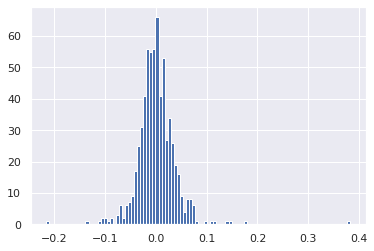

In [ ]:
#wyświetlanie histogramu
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)



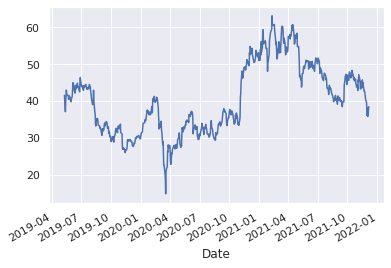

In [ ]:
df.Close.plot()

# Filtrowanie danych

In [ ]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.000,45.0000,41.0600,41.57,186322536,41.7850,NaN,NaN
2019-05-13,38.790,39.2400,36.0800,37.10,79442420,37.9450,41.57,-0.107529
2019-05-14,38.310,39.9600,36.8500,39.96,46661147,39.1350,37.10,0.077089
2019-05-15,39.370,41.8800,38.9500,41.29,36086065,40.3300,39.96,0.033283
2019-05-16,41.480,44.0600,41.2500,43.00,38115524,42.2400,41.29,0.041414
2019-05-17,41.980,43.2900,41.2700,41.91,20225687,41.9450,43.00,-0.025349
2019-05-20,41.190,41.6800,39.4600,41.59,29222330,41.3900,41.91,-0.007635
2019-05-21,42.000,42.2400,41.2500,41.50,10802851,41.7500,41.59,-0.002164
2019-05-22,41.050,41.2800,40.5000,41.25,9089469,41.1500,41.50,-0.006024


# Zapis/odczyt danych z pliku CSV

In [ ]:
#zapisywanie danych
df.to_csv('fb.csv')

In [ ]:
df_nov = df[(df.index.month == 11) & (df.index.year == 2020)]

df_nov.to_csv('fb_nov.csv')

                 Open       High        Low    Close   Volume
Date                                                         
2020-11-30  3208.4800  3228.3900  3125.5500  3168.04  4063916
2020-11-27  3211.2600  3216.1900  3190.0500  3195.34  2392867
2020-11-25  3141.8700  3198.0000  3140.2600  3185.07  3790403
2020-11-24  3100.5000  3134.2500  3086.2580  3118.06  3602102
2020-11-23  3116.6986  3139.7450  3065.4600  3098.39  4708887
2020-11-20  3117.0200  3132.8900  3098.0456  3099.40  3380138
2020-11-19  3105.3100  3125.0000  3080.9200  3117.02  3010270
2020-11-18  3134.0000  3140.0000  3105.1000  3105.46  2916836
2020-11-17  3183.5445  3189.2500  3135.2600  3135.66  3444735
2020-11-16  3093.2000  3142.7000  3072.6850  3131.06  3808676
2020-11-13  3122.0000  3141.7227  3085.3900  3128.81  3762587
2020-11-12  3159.9500  3175.8800  3086.0500  3110.28  4371208
2020-11-11  3061.7800  3139.1450  3050.0000  3137.39  4366923
2020-11-10  3095.0200  3114.0000  3019.4828  3035.02  6590956
2020-11-

In [ ]:
#odczyt danych
new_df = pd.read_csv('fb_nov.csv')
new_df

,Date,Open,High,Low,Close,Volume
0,2020-11-30,3208.4800,3228.3900,3125.5500,3168.04,4063916
1,2020-11-27,3211.2600,3216.1900,3190.0500,3195.34,2392867
2,2020-11-25,3141.8700,3198.0000,3140.2600,3185.07,3790403
3,2020-11-24,3100.5000,3134.2500,3086.2580,3118.06,3602102
4,2020-11-23,3116.6986,3139.7450,3065.4600,3098.39,4708887
5,2020-11-20,3117.0200,3132.8900,3098.0456,3099.40,3380138
6,2020-11-19,3105.3100,3125.0000,3080.9200,3117.02,3010270
7,2020-11-18,3134.0000,3140.0000,3105.1000,3105.46,2916836
8,2020-11-17,3183.5445,3189.2500,3135.2600,3135.66,3444735
9,2020-11-16,3093.2000,3142.7000,3072.6850,3131.06,3808676


In [ ]:
#zapis do excel
df_nov.to_excel('fb_nov.xlsx')

In [ ]:
#zapis do excel
new_df = pd.read_excel('fb_nov.xlsx', index_col=0)
new_df

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-30,3208.4800,3228.3900,3125.5500,3168.04,4063916
2020-11-27,3211.2600,3216.1900,3190.0500,3195.34,2392867
2020-11-25,3141.8700,3198.0000,3140.2600,3185.07,3790403
2020-11-24,3100.5000,3134.2500,3086.2580,3118.06,3602102
2020-11-23,3116.6986,3139.7450,3065.4600,3098.39,4708887
2020-11-20,3117.0200,3132.8900,3098.0456,3099.40,3380138
2020-11-19,3105.3100,3125.0000,3080.9200,3117.02,3010270
2020-11-18,3134.0000,3140.0000,3105.1000,3105.46,2916836
2020-11-17,3183.5445,3189.2500,3135.2600,3135.66,3444735


# London Bike Dataset

In [ ]:
df = pd.read_csv('london_bike.csv')

df.set_index('timestamp')
df.head()


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


# Łączenie danych

In [ ]:
apple = fetch_financial_data('AAPL')
amazon = fetch_financial_data('AMZN')
google = fetch_financial_data('GOOGL')
uber = fetch_financial_data('UBER')

In [ ]:
apple.columns = ['apple_' + col.lower() for col in apple.columns]
amazon.columns = ['amazon_' + col.lower() for col in amazon.columns]
google.columns = ['google_' + col.lower() for col in google.columns]
uber.columns = ['uber_' + col.lower() for col in uber.columns]

In [ ]:
apple.head()

,apple_open,apple_high,apple_low,apple_close,apple_volume
Date,,,,,
2021-12-06,164.290,167.8799,164.28,165.32,107496982
2021-12-03,164.020,164.9600,159.72,161.84,118023116
2021-12-02,158.735,164.2000,157.80,163.76,136739174
2021-12-01,167.480,170.3000,164.53,164.77,152423003
2021-11-30,159.985,165.5200,159.92,165.30,174048056


In [ ]:
#kontatencja dancyh(łączenie)
df = pd.concat(objs=[apple, amazon, google, uber], axis=1)

In [ ]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

df.describe().T

,count,mean,std,min,25%,50%,75%,max
apple_open,1257.00,71.44,39.61,26.09,41.16,51.62,113.24,167.48
apple_high,1257.00,72.22,40.08,26.45,41.50,52.25,114.68,170.30
apple_low,1257.00,70.70,39.13,26.03,40.76,51.00,111.47,164.53
apple_close,1257.00,71.50,39.63,26.39,41.09,51.59,113.15,165.32
apple_volume,1257.00,123818361.04,57535889.66,40999950.00,85863480.00,108706528.00,144185313.00,468564608.00
amazon_open,1257.00,2051.38,877.45,757.92,1454.20,1821.49,3101.00,3744.00
amazon_high,1257.00,2072.64,887.88,758.76,1472.58,1833.42,3134.25,3773.08
amazon_low,1257.00,2027.76,866.24,747.70,1427.48,1804.20,3065.46,3696.79
amazon_close,1257.00,2050.63,876.40,749.87,1460.09,1819.26,3098.39,3731.41
amazon_volume,1257.00,4271557.65,2051936.25,881337.00,2889515.00,3681522.00,5093982.00,16552598.00


In [ ]:
#współczynnik korelacji
df.corr()

,apple_open,apple_high,apple_low,apple_close,apple_volume,amazon_open,amazon_high,amazon_low,amazon_close,amazon_volume,google_open,google_high,google_low,google_close,google_volume,uber_open,uber_high,uber_low,uber_close,uber_volume
apple_open,1.00,1.00,1.00,1.00,-0.16,0.96,0.96,0.96,0.96,-0.13,0.94,0.94,0.94,0.94,-0.09,0.59,0.59,0.59,0.59,-0.01
apple_high,1.00,1.00,1.00,1.00,-0.15,0.96,0.96,0.96,0.96,-0.12,0.94,0.94,0.94,0.94,-0.09,0.58,0.58,0.58,0.58,-0.00
apple_low,1.00,1.00,1.00,1.00,-0.17,0.96,0.96,0.96,0.96,-0.13,0.94,0.94,0.94,0.94,-0.10,0.59,0.59,0.59,0.59,-0.01
apple_close,1.00,1.00,1.00,1.00,-0.16,0.96,0.96,0.96,0.96,-0.13,0.94,0.94,0.94,0.94,-0.10,0.58,0.59,0.59,0.59,-0.01
apple_volume,-0.16,-0.15,-0.17,-0.16,1.00,-0.10,-0.09,-0.11,-0.10,0.56,-0.24,-0.24,-0.25,-0.25,0.52,-0.44,-0.43,-0.46,-0.45,0.31
amazon_open,0.96,0.96,0.96,0.96,-0.10,1.00,1.00,1.00,1.00,-0.04,0.88,0.88,0.88,0.88,-0.05,0.58,0.59,0.59,0.59,-0.07
amazon_high,0.96,0.96,0.96,0.96,-0.09,1.00,1.00,1.00,1.00,-0.03,0.88,0.88,0.87,0.88,-0.04,0.58,0.58,0.58,0.58,-0.06
amazon_low,0.96,0.96,0.96,0.96,-0.11,1.00,1.00,1.00,1.00,-0.05,0.88,0.88,0.88,0.88,-0.06,0.59,0.59,0.60,0.59,-0.07
amazon_close,0.96,0.96,0.96,0.96,-0.10,1.00,1.00,1.00,1.00,-0.04,0.88,0.88,0.88,0.88,-0.05,0.58,0.59,0.59,0.59,-0.07
amazon_volume,-0.13,-0.12,-0.13,-0.13,0.56,-0.04,-0.03,-0.05,-0.04,1.00,-0.16,-0.16,-0.17,-0.16,0.60,-0.27,-0.26,-0.29,-0.28,0.26


In [ ]:
closes = [col for col in df.columns if col.endswith('close')]
closes

['apple_close', 'amazon_close', 'google_close', 'uber_close']

In [ ]:
df[closes].corr()

,apple_close,amazon_close,google_close,uber_close
apple_close,1.00,0.96,0.94,0.59
amazon_close,0.96,1.00,0.88,0.59
google_close,0.94,0.88,1.00,0.56
uber_close,0.59,0.59,0.56,1.00


In [ ]:
closes = [col for col in df.columns if col.endswith('close') or col.endswith('volume')] 
closes

['apple_close',
 'apple_volume',
 'amazon_close',
 'amazon_volume',
 'google_close',
 'google_volume',
 'uber_close',
 'uber_volume']

In [ ]:
df[closes].corr()

,apple_close,apple_volume,amazon_close,amazon_volume,google_close,google_volume,uber_close,uber_volume
apple_close,1.00,-0.16,0.96,-0.13,0.94,-0.10,0.59,-0.01
apple_volume,-0.16,1.00,-0.10,0.56,-0.25,0.52,-0.45,0.31
amazon_close,0.96,-0.10,1.00,-0.04,0.88,-0.05,0.59,-0.07
amazon_volume,-0.13,0.56,-0.04,1.00,-0.16,0.60,-0.28,0.26
google_close,0.94,-0.25,0.88,-0.16,1.00,-0.13,0.56,-0.00
google_volume,-0.10,0.52,-0.05,0.60,-0.13,1.00,-0.21,0.28
uber_close,0.59,-0.45,0.59,-0.28,0.56,-0.21,1.00,-0.21
uber_volume,-0.01,0.31,-0.07,0.26,-0.00,0.28,-0.21,1.00


# Łączenie danych metoda append

In [ ]:
uber.head()
uber_6 = uber[uber.index.month == 6]
uber_7 = uber[uber.index.month == 7]

In [ ]:
uber_6_7 = uber_6.append(uber_7)
uber_6_7

,uber_open,uber_high,uber_low,uber_close,uber_volume
Date,,,,,
2021-06-30,51.02,51.13,49.71,50.12,18069434
2021-06-29,51.00,51.30,50.24,50.76,14104177
2021-06-28,51.75,52.36,50.37,51.11,22518031
2021-06-25,51.18,51.83,50.53,51.73,25727827
2021-06-24,51.30,51.55,50.22,50.82,12403301
...,...,...,...,...,...
2019-07-08,43.59,43.85,42.75,42.95,9304101
2019-07-05,44.31,44.55,43.01,43.53,8239452
2019-07-03,44.00,44.46,43.79,44.23,3380003
